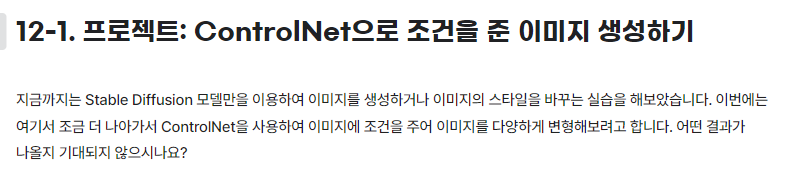

In [20]:
# Stable Diffusion 설치
!pip install --upgrade -qq git+https://github.com/huggingface/diffusers.git transformers accelerate

^C
ERROR: Operation cancelled by user


In [3]:
# 메모리 삭제
import torch
torch.cuda.empty_cache()

In [4]:
# controlnet-aux를 설치합니다. Human pose를 검출해주는 controlnet의 보조용 모델입니다.
!pip install controlnet-aux==0.0.1

In [4]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel

canny_controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16)
canny_pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=canny_controlnet, torch_dtype=torch.float16
)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [5]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel 

openpose_controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-openpose", torch_dtype=torch.float16)
openpose_pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=openpose_controlnet, torch_dtype=torch.float16
)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

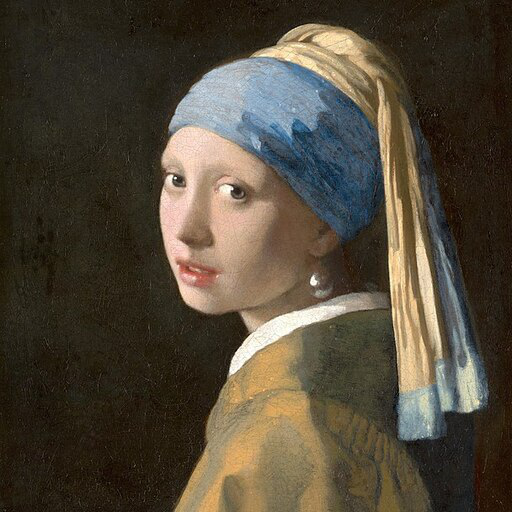

In [6]:
import torch
from diffusers import StableDiffusionControlNetPipeline
from diffusers.utils import load_image 

# 이미지 불러오기
image = load_image(
    "https://hf.co/datasets/huggingface/documentation-images/resolve/main/diffusers/input_image_vermeer.png"
)

image

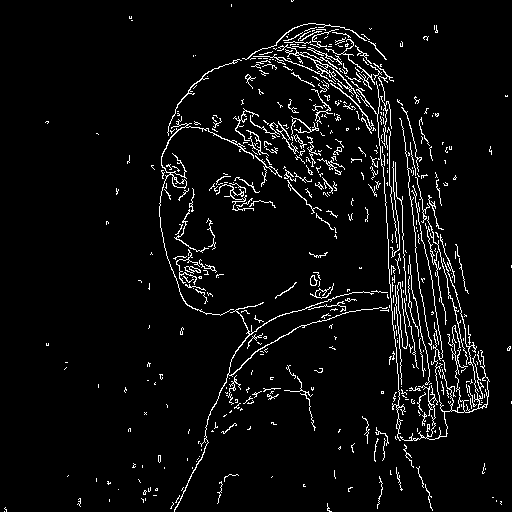

In [7]:
import cv2
from PIL import Image 
import numpy as np

# 이미지를 NumPy 배열로 변환합니다. 
image = np.array(image)

# threshold를 지정합니다. 
low_threshold = 100
high_threshold = 200

# 윤곽선을 검출합니다. 
image = cv2.Canny(image, low_threshold, high_threshold)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
canny_image = Image.fromarray(image)  # NumPy 배열을 PIL 이미지로 변환합니다. 

canny_image

In [6]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel

canny_controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16)
canny_pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=canny_controlnet, torch_dtype=torch.float16
)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

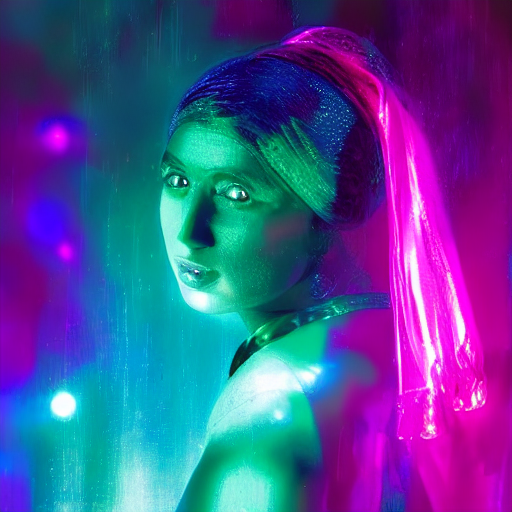

In [11]:
from diffusers import UniPCMultistepScheduler
canny_pipe.scheduler = UniPCMultistepScheduler.from_config(canny_pipe.scheduler.config)
canny_pipe = canny_pipe.to("cuda")

# 동일한 이미지를 생성하기 위해 seed를 지정합니다. 
generator = torch.manual_seed(0)  

# 이미지를 생성합니다. 
canny_image = canny_pipe(
    prompt="disco dancer with colorful lights", 
    num_inference_steps=20, 
    generator=generator, 
    image=canny_image
).images[0]

# 생성된 이미지를 저장합니다. 
canny_image.save("/aiffel/aiffel/canny_image.png")  

# 생성된 이미지를 출력합니다. 
canny_image

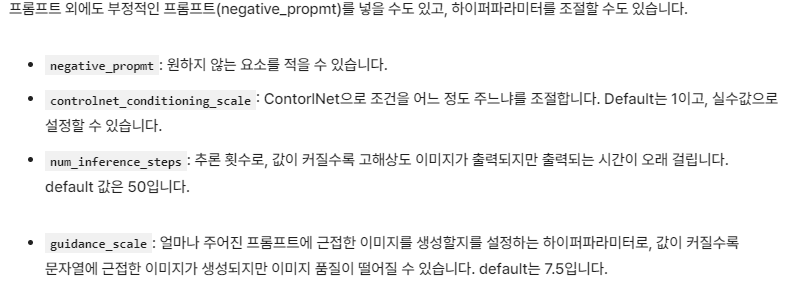

Token indices sequence length is longer than the specified maximum sequence length for this model (85 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['harsh, artificial lighting of the futuristic cityscape']


  0%|          | 0/20 [00:00<?, ?it/s]

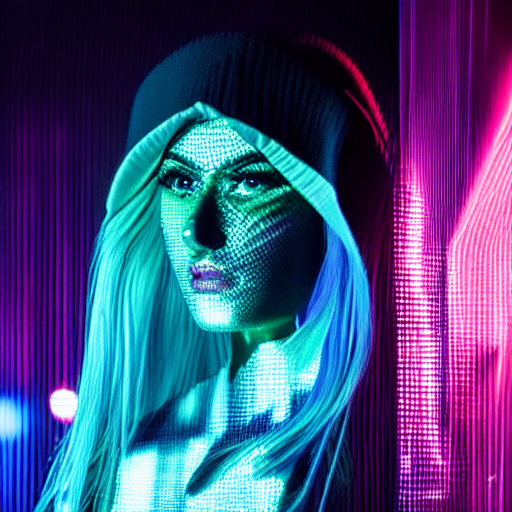

In [12]:
# Q. 프롬프트를 작성하고 하이퍼파라미터를 조절하여 이미지를 생성해 보세요. 
from diffusers import UniPCMultistepScheduler
canny_pipe.scheduler = UniPCMultistepScheduler.from_config(canny_pipe.scheduler.config)
canny_pipe = canny_pipe.to("cuda")

# 동일한 이미지를 생성하기 위해 seed를 지정합니다. 
generator = torch.manual_seed(0)  

# 이미지를 생성합니다. 
canny_image = canny_pipe(
    prompt=" A futuristic person portrayed through a captivating photograph, shot with a 50mm lens to emphasize intimacy. The scene captures the subject in a cyberpunk alleyway, surrounded by neon lights and holographic advertisements. The color temperature is dominated by gritty, urban tones with pops of vibrant neon colors. The protagonist's expression reveals a combination of resilience and adaptability, illuminated by the harsh, artificial lighting of the futuristic cityscape", 
    negative_prompt= 'ugly, tiling, poorly drawn hands, poorly drawn feet, poorly drawn face, out of frame, mutation, mutated, extra limbs, extra legs, extra arms, disfigured, deformed, cross-eye, Body out of frame, Blurry, Bad art, Bad anatomy, Blurred, Watermark, Grainy, Duplicate',
    num_inference_steps=20, 
    generator=generator, 
    image=canny_image
).images[0]

# 생성된 이미지를 저장합니다. 
canny_image.save("/aiffel/aiffel/canny_image.png")  

# 생성된 이미지를 출력합니다. 
canny_image

In [13]:
# controlnet-aux를 설치합니다. Human pose를 검출해주는 controlnet의 보조용 모델입니다.
!pip install controlnet-aux==0.0.1

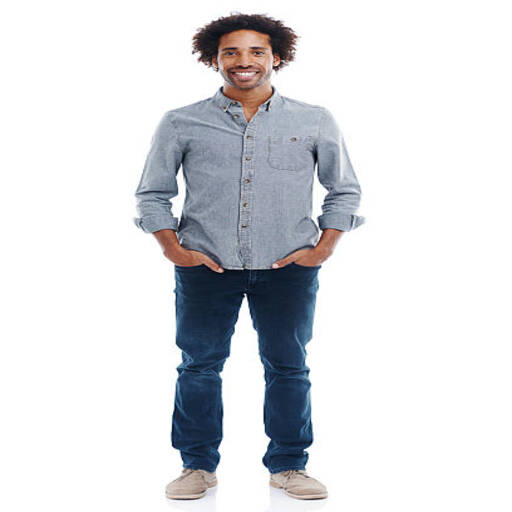

In [14]:
from diffusers.utils import load_image

openpose_image = load_image(
    "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/person.png"
)
openpose_image

cuda


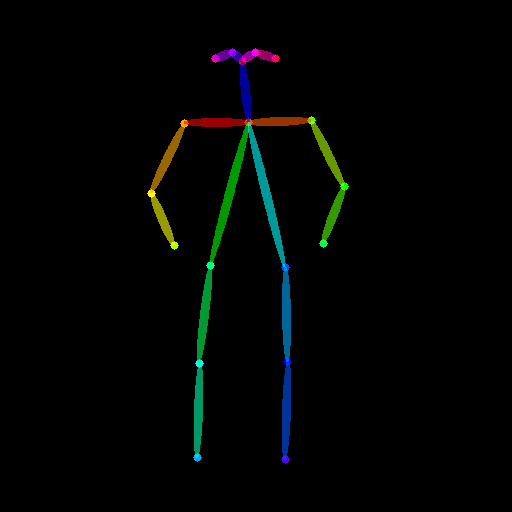

In [15]:
from controlnet_aux import OpenposeDetector

# 인체의 자세를 검출하는 사전 학습된 ControlNet 불러오기
openpose = OpenposeDetector.from_pretrained("lllyasviel/ControlNet")

# 이미지에서 자세 검출
openpose_image = openpose(openpose_image)
openpose_image

In [7]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel 

openpose_controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-openpose", torch_dtype=torch.float16)
openpose_pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=openpose_controlnet, torch_dtype=torch.float16
)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

### 프롬프트를 변경하면서 다양한 이미지 생성

Token indices sequence length is longer than the specified maximum sequence length for this model (85 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['by the dynamic play of light and shadow']


  0%|          | 0/20 [00:00<?, ?it/s]

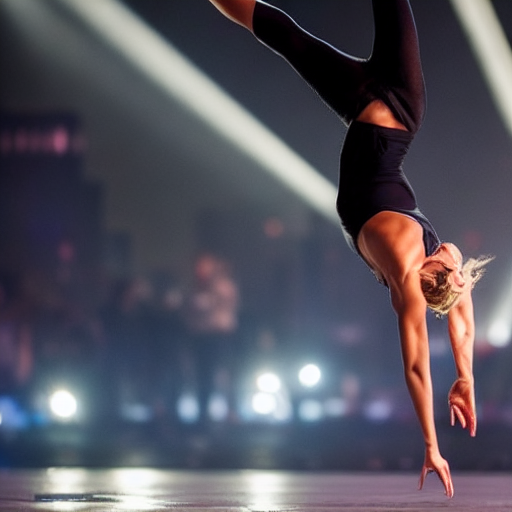

In [17]:
from diffusers import UniPCMultistepScheduler

openpose_pipe.scheduler = UniPCMultistepScheduler.from_config(openpose_pipe.scheduler.config)
openpose_pipe = openpose_pipe.to("cuda")

# Q. 코드를 작성해 보세요.
# 동일한 이미지를 생성하기 위해 seed를 넣어줍니다. 
generator = torch.manual_seed(0) 

#프롬프트를 작성합니다. 
prompt=''' A dancer captured in a captivating photograph with a 85mm lens, emphasizing the fluidity of movement. The scene is set against an urban backdrop with the dancer leaping gracefully amidst city lights and reflections. The color temperature is a mix of cool city tones and warm spotlights, enhancing the contrast.  The dancer's expression radiates energy and freedom, accentuated by the dynamic play of light and shadow '''
#prompt =  '''A portrait portrayed in a captivating digital illustration inspired by the dynamic style of modern portraiture. The scene unfolds in a virtual setting, with the subject's portrait exuding character and charm. The color palette is bold and dynamic, featuring a mix of vibrant hues and dynamic lighting effects that enhance the energy of the composition. The subject's expression is detailed with a blend of passion and allure, creating a visually captivating and emotionally resonant representation of contemporary portraiture. '''
negative_prompt = "ugly, tiling, poorly drawn hands, poorly drawn feet, poorly drawn face, out of frame, mutation, mutated, extra limbs, extra legs, extra arms, disfigured, deformed, cross-eye, Body out of frame, Blurry, Bad art, Bad anatomy, Blurred, Watermark, Grainy, Duplicate"

images = openpose_image

# 이미지를 생성합니다. 
openpose_image1 = openpose_pipe(
    prompt= prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=20, 
    generator=generator, 
    image=canny_image
).images[0]

# 생성된 이미지를 출력합니다. 
openpose_image1

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['and determination, illuminated by the dynamic interplay of urban lighting.']


  0%|          | 0/20 [00:00<?, ?it/s]

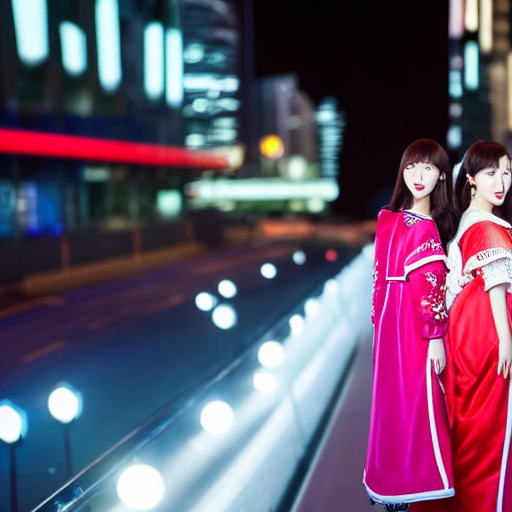

In [18]:
# Q. 프롬프트를 작성하고 하이퍼파라미터를 조절하여 이미지를 생성해 보세요. 
from diffusers import UniPCMultistepScheduler

openpose_pipe.scheduler = UniPCMultistepScheduler.from_config(openpose_pipe.scheduler.config)
openpose_pipe = openpose_pipe.to("cuda")

# Q. 코드를 작성해 보세요.
# 동일한 이미지를 생성하기 위해 seed를 넣어줍니다. 
generator = torch.manual_seed(0) 

#프롬프트를 작성합니다. 
prompt =  "A Korean solo female idol captured in a striking photograph with a 85mm lens, emphasizing individuality and authenticity. The scene is set against an urban backdrop, with the idol standing confidently amidst modern architecture and city lights. The color temperature is a mix of warm city tones and cool reflections, creating a visually striking composition. The idol's expression is a blend of confidence and determination, illuminated by the dynamic interplay of urban lighting. "
negative_prompt = "ugly, tiling, poorly drawn hands, poorly drawn feet, poorly drawn face, out of frame, mutation, mutated, extra limbs, extra legs, extra arms, disfigured, deformed, cross-eye, Body out of frame, Blurry, Bad art, Bad anatomy, Blurred, Watermark, Grainy, Duplicate"

images = openpose_image

# 이미지를 생성합니다. 
openpose_image1 = openpose_pipe(
    prompt= prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=20, 
    generator=generator, 
    image=canny_image
).images[0]

# 생성된 이미지를 출력합니다. 
openpose_image1

In [12]:
# 메모리 삭제
import torch
torch.cuda.empty_cache()

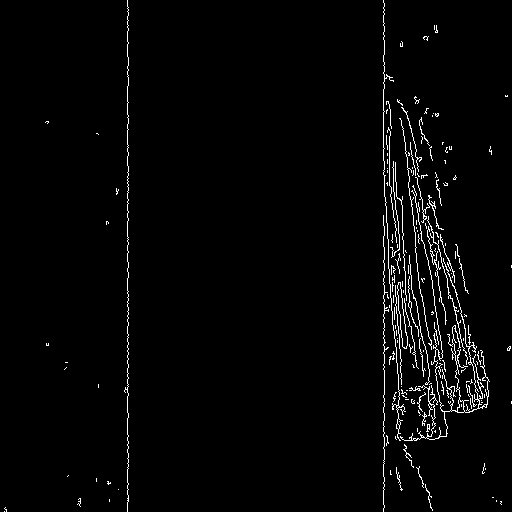

In [2]:
from diffusers.utils import load_image 
from PIL import Image
import cv2
import numpy as np
from diffusers.utils import load_image

from PIL import Image



# 이미지 경로


canny_image = load_image("https://hf.co/datasets/huggingface/documentation-images/resolve/main/diffusers/input_image_vermeer.png"
)

# Q. 코드를 작성해 보세요.
# 이미지를 불러오세요. 
#canny_image = load_image(image_path)
#canny_image = # [[YOUR CODE]]

#threshhold를 지정합니다. 
low_threshold =100
high_threshold = 200

# 이미지를 NumPy 배열로 변환합니다. 
canny_image = np.array(canny_image)

# 인체 감지 포즈를 넣어줄 가운데 부분을 지워줍니다. 
zero_start = canny_image.shape[1] // 4
zero_end = zero_start + canny_image.shape[1] // 2

canny_image[:, zero_start:zero_end] = 0

# 윤곽선을 검출하고 NumPy 배열을 PIL 이미지로 변환합니다. 
canny_image = cv2.Canny(canny_image, low_threshold, high_threshold)
canny_image = canny_image[:, :, None]
canny_image =np.concatenate([canny_image, canny_image, canny_image], axis=2)
canny_image = Image.fromarray(canny_image)
canny_image

### 새로운 포즈를 얻기위해 로컬환경의 이미지를 가져와 포즈생성

cuda


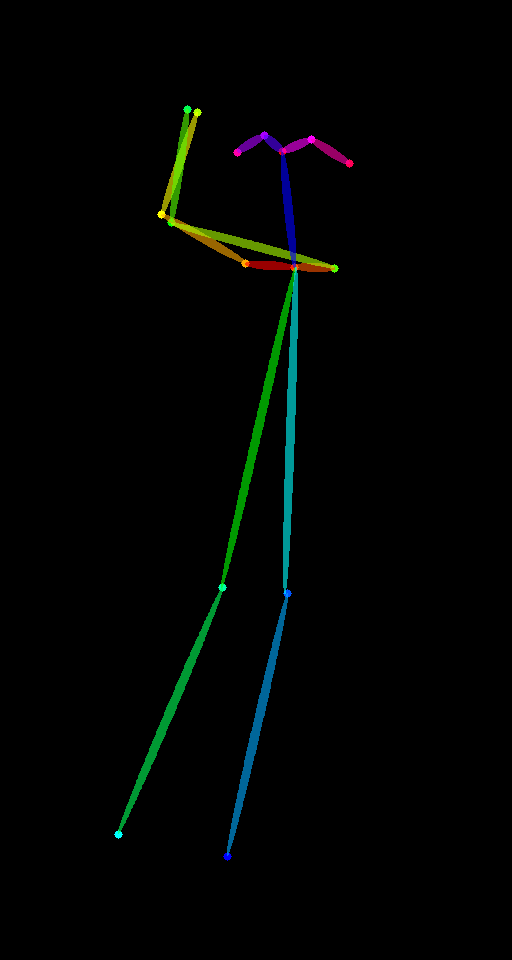

In [11]:
from controlnet_aux import OpenposeDetector
from diffusers.utils import load_image \
# # 이미지를 불러오는 함수
def load_image(image_path):
    image = Image.open(image_path)
    return image
image_path = "/aiffel/aiffel/next_level.png"
# Q. 아래의 코드를 작성해 주세요.
# 이미지를 불러옵니다. 
openpose_image = load_image(image_path)

# OpenposeDetector를 사용하여 인체 자세를 검출합니다. 
openpose = OpenposeDetector.from_pretrained("lllyasviel/ControlNet")
openpose_image = openpose(openpose_image)
openpose_image

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (105 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['rhythm of the ocean waves. the lighting is warm and golden, casting long, graceful shadows as the dancer moves with the rhythm of the sea']


  0%|          | 0/20 [00:00<?, ?it/s]

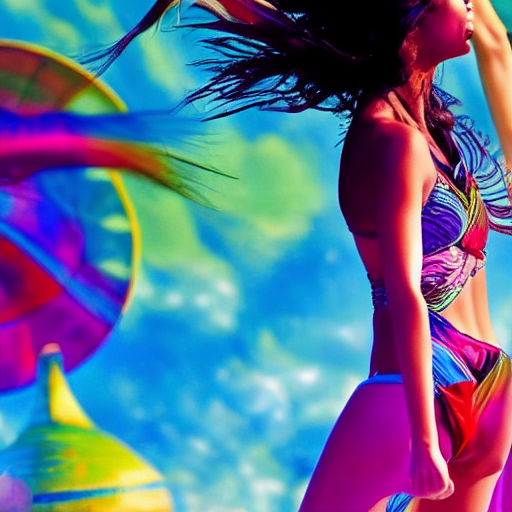

In [16]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler  
import torch
canny_controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16)
openpose_controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-openpose", torch_dtype=torch.float16)
# Q. 코드를 작성해 보세요.
# Edge Detection과 Openpose, 2개의 전처리기를 controlnets라는 리스트로 만듭니다. 
controlnets =[ openpose_controlnet,canny_controlnet]

# 리스트 controlnets를 파이프라인으로 전달합니다. 
pipe = StableDiffusionControlNetPipeline.from_pretrained( "runwayml/stable-diffusion-v1-5", controlnet=controlnets, torch_dtype=torch.float16)

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

# 프롬프트를 작성합니다. 
prompt ='''  A dancing dancer in a vibrant digital illustration set against the backdrop of a stunning beach. The scene unfolds with the dancer's dynamic and expressive movements on the sandy shore, capturing the essence of joy and freedom. The color palette is lively, featuring a mix of tropical hues and the natural beauty of the beach. The dancer's expression reflects pure happiness, resonating with the natural rhythm of the ocean waves. The lighting is warm and golden, casting long, graceful shadows as the dancer moves with the rhythm of the sea'''

negative_prompt =  'ugly, tiling, poorly drawn hands, poorly drawn feet, poorly drawn face, out of frame, mutation, mutated, extra limbs, extra legs, extra arms, disfigured, deformed, cross-eye, Body out of frame, Blurry, Bad art, Bad anatomy, Blurred, Watermark, Grainy, Duplicate'

# seed를 지정합니다. 
generator = torch.manual_seed(0) 

images = [canny_image,openpose_image]

# 이미지를 생성합니다. 
image = pipe(
    prompt= prompt,
    controlnet_conditioning_scale=[1.0],
    negative_prompt=negative_prompt,
    num_inference_steps=20, 
    generator=generator, 
    image=images,
    guidance_scale=4
).images[0]


# 생성된 이미지를 저장합니다.
image.save("/aiffel/aiffel/multi_controlnet_output.png")

# 생성된 이미지를 출력합니다.  
image

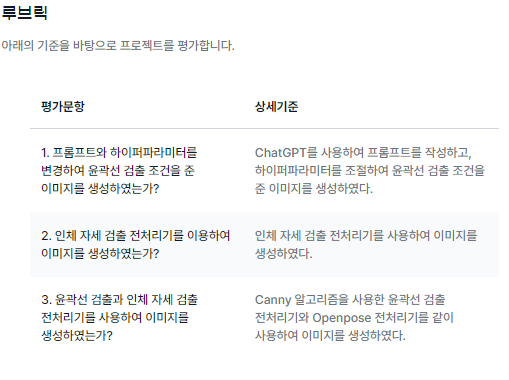

## 회고
- k:시간이 오래걸리고 메모리문제와 오류가 많았지만, 새로운 시도를 위해 시간을 투자하여 결과를 얻어냈다.
- p:오류가 많고 원하는 포즈의 생성이미지를 얻지못하였다. 프롬프트작성에 아직 미숙한것같고 다양한 시도를 하지못한거같다.아직 사람의 얼굴이나 모습 행동등 복잡한구조는 생성하기 힘든것같았다. 원하는 퀄리티는 나오지않아 조금 아쉬웠다.
- t:다양한 포즈를 가져와서 프롬프트를 잘 작성하여 원하는 이미지를 얻기위해 공부를 더 해야할것같다. 이미지자체는 너무 신기하고 내가 원하는 ai아바타, 버츄얼휴먼까지 도전해보겠다.